# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
Cancer_df=pd.read_csv('breast-cancer-wisconsin-data.csv')
Cancer_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
# Datatypes of each column
Cancer_df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [5]:
# shape of dataset
Cancer_df.shape

(699, 11)

In [6]:
# Descriptive analysis
Cancer_df.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [7]:
Cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [8]:
# We could see "?" values in column, this should be removed from data set
print ((Cancer_df.astype(str) != '?').all(axis=0))


ID                              True
ClumpThickness                  True
Cell Size                       True
Cell Shape                      True
Marginal Adhesion               True
Single Epithelial Cell Size     True
Bare Nuclei                    False
Normal Nucleoli                 True
Bland Chromatin                 True
Mitoses                         True
Class                           True
dtype: bool


#### column Bare Nuclei is having "?" values in column

In [9]:
# Check for missing value in any other column
Cancer_df.isnull().any()

ID                             False
ClumpThickness                 False
Cell Size                      False
Cell Shape                     False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Normal Nucleoli                False
Bland Chromatin                False
Mitoses                        False
Class                          False
dtype: bool

In [10]:
print("Total missing values in database is = " + str(Cancer_df.isnull().sum().sum()))

Total missing values in database is = 0


In [11]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
temp = pd.DataFrame(Cancer_df['Bare Nuclei'].str.isdigit())  # if the string is made of digits store True else False  in the Bare Nuclei column 
# in temp dataframe

temp[temp['Bare Nuclei'] == False]   # from temp take only those rows where Bare Nuclei has false



,Bare Nuclei
23,False
40,False
139,False
145,False
158,False
164,False
235,False
249,False
275,False
292,False


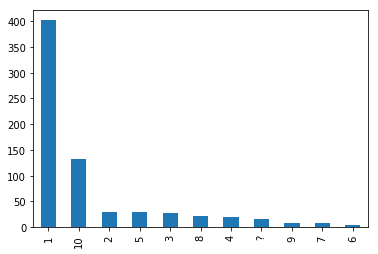

In [12]:
pd.value_counts(Cancer_df['Bare Nuclei']).plot(kind='bar')

#### - From distribution we can see that maximum distribution is at 1 value so replace ? with 1 i.e. by mode of Bare Nuclei

In [13]:
Cancer_df.replace('?',Cancer_df['Bare Nuclei'].mode()[0],inplace=True)
Cancer_df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '5', '8', '6'], dtype=object)

In [14]:
#duplicate data
df_dup=Cancer_df[Cancer_df.duplicated(keep='first')]
df_dup


,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
208,1218860,1,1,1,1,1,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
254,1116116,9,10,10,1,10,8,3,3,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
272,320675,3,3,5,2,3,10,7,1,1,4
322,733639,3,1,1,1,2,1,3,1,1,2
338,704097,1,1,1,1,1,1,2,1,1,2
561,1321942,5,1,1,1,2,1,3,1,1,2
684,466906,1,1,1,1,2,1,1,1,1,2


In [15]:
print("duplicate rows",len(df_dup))

duplicate rows 9


In [16]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
# dropping duplicate values 
Cancer_df.drop_duplicates(keep='first',inplace=True)

In [17]:
print("original rows", len(Cancer_df) )


original rows 690


In [18]:
Cancer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,690.0,1.073826e+06,619609.221048,61634.0,874484.5,1171752.5,1238450.5,13454352.0
ClumpThickness,690.0,4.428986e+00,2.817378,1.0,2.0,4.0,6.0,10.0
Cell Size,690.0,3.133333e+00,3.042451,1.0,1.0,1.0,5.0,10.0
Cell Shape,690.0,3.204348e+00,2.960844,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,690.0,2.827536e+00,2.867787,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,690.0,3.213043e+00,2.200964,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,690.0,3.436232e+00,2.444060,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,690.0,2.885507e+00,3.067682,1.0,1.0,1.0,4.0,10.0
Mitoses,690.0,1.594203e+00,1.724230,1.0,1.0,1.0,1.0,10.0
Class,690.0,2.689855e+00,0.951379,2.0,2.0,2.0,4.0,4.0


In [19]:
# changing type of 'Bare Nuclei' column from object to 'int64'

Cancer_df['Bare Nuclei'] = Cancer_df['Bare Nuclei'].astype('int64')

In [20]:
Cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 698
Data columns (total 11 columns):
ID                             690 non-null int64
ClumpThickness                 690 non-null int64
Cell Size                      690 non-null int64
Cell Shape                     690 non-null int64
Marginal Adhesion              690 non-null int64
Single Epithelial Cell Size    690 non-null int64
Bare Nuclei                    690 non-null int64
Normal Nucleoli                690 non-null int64
Bland Chromatin                690 non-null int64
Mitoses                        690 non-null int64
Class                          690 non-null int64
dtypes: int64(11)
memory usage: 64.7 KB


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [21]:
# Check for correlation of variable
Cancer_df.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.059592,-0.043856,-0.042803,-0.066771,-0.048102,-0.091832,-0.059802,-0.054517,-0.036286,-0.080084
ClumpThickness,-0.059592,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,-0.043856,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,-0.042803,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,-0.066771,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,-0.048102,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,-0.091832,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,-0.059802,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,-0.054517,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,-0.036286,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947


- Target variable(class) is highly correlated with cell shape and cell size. 
- cell shape and cell size are highly correlated. 
-  Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli and bland chromatin

In [22]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [23]:
Cancer_df_attr=Cancer_df.drop(columns=['ID'])

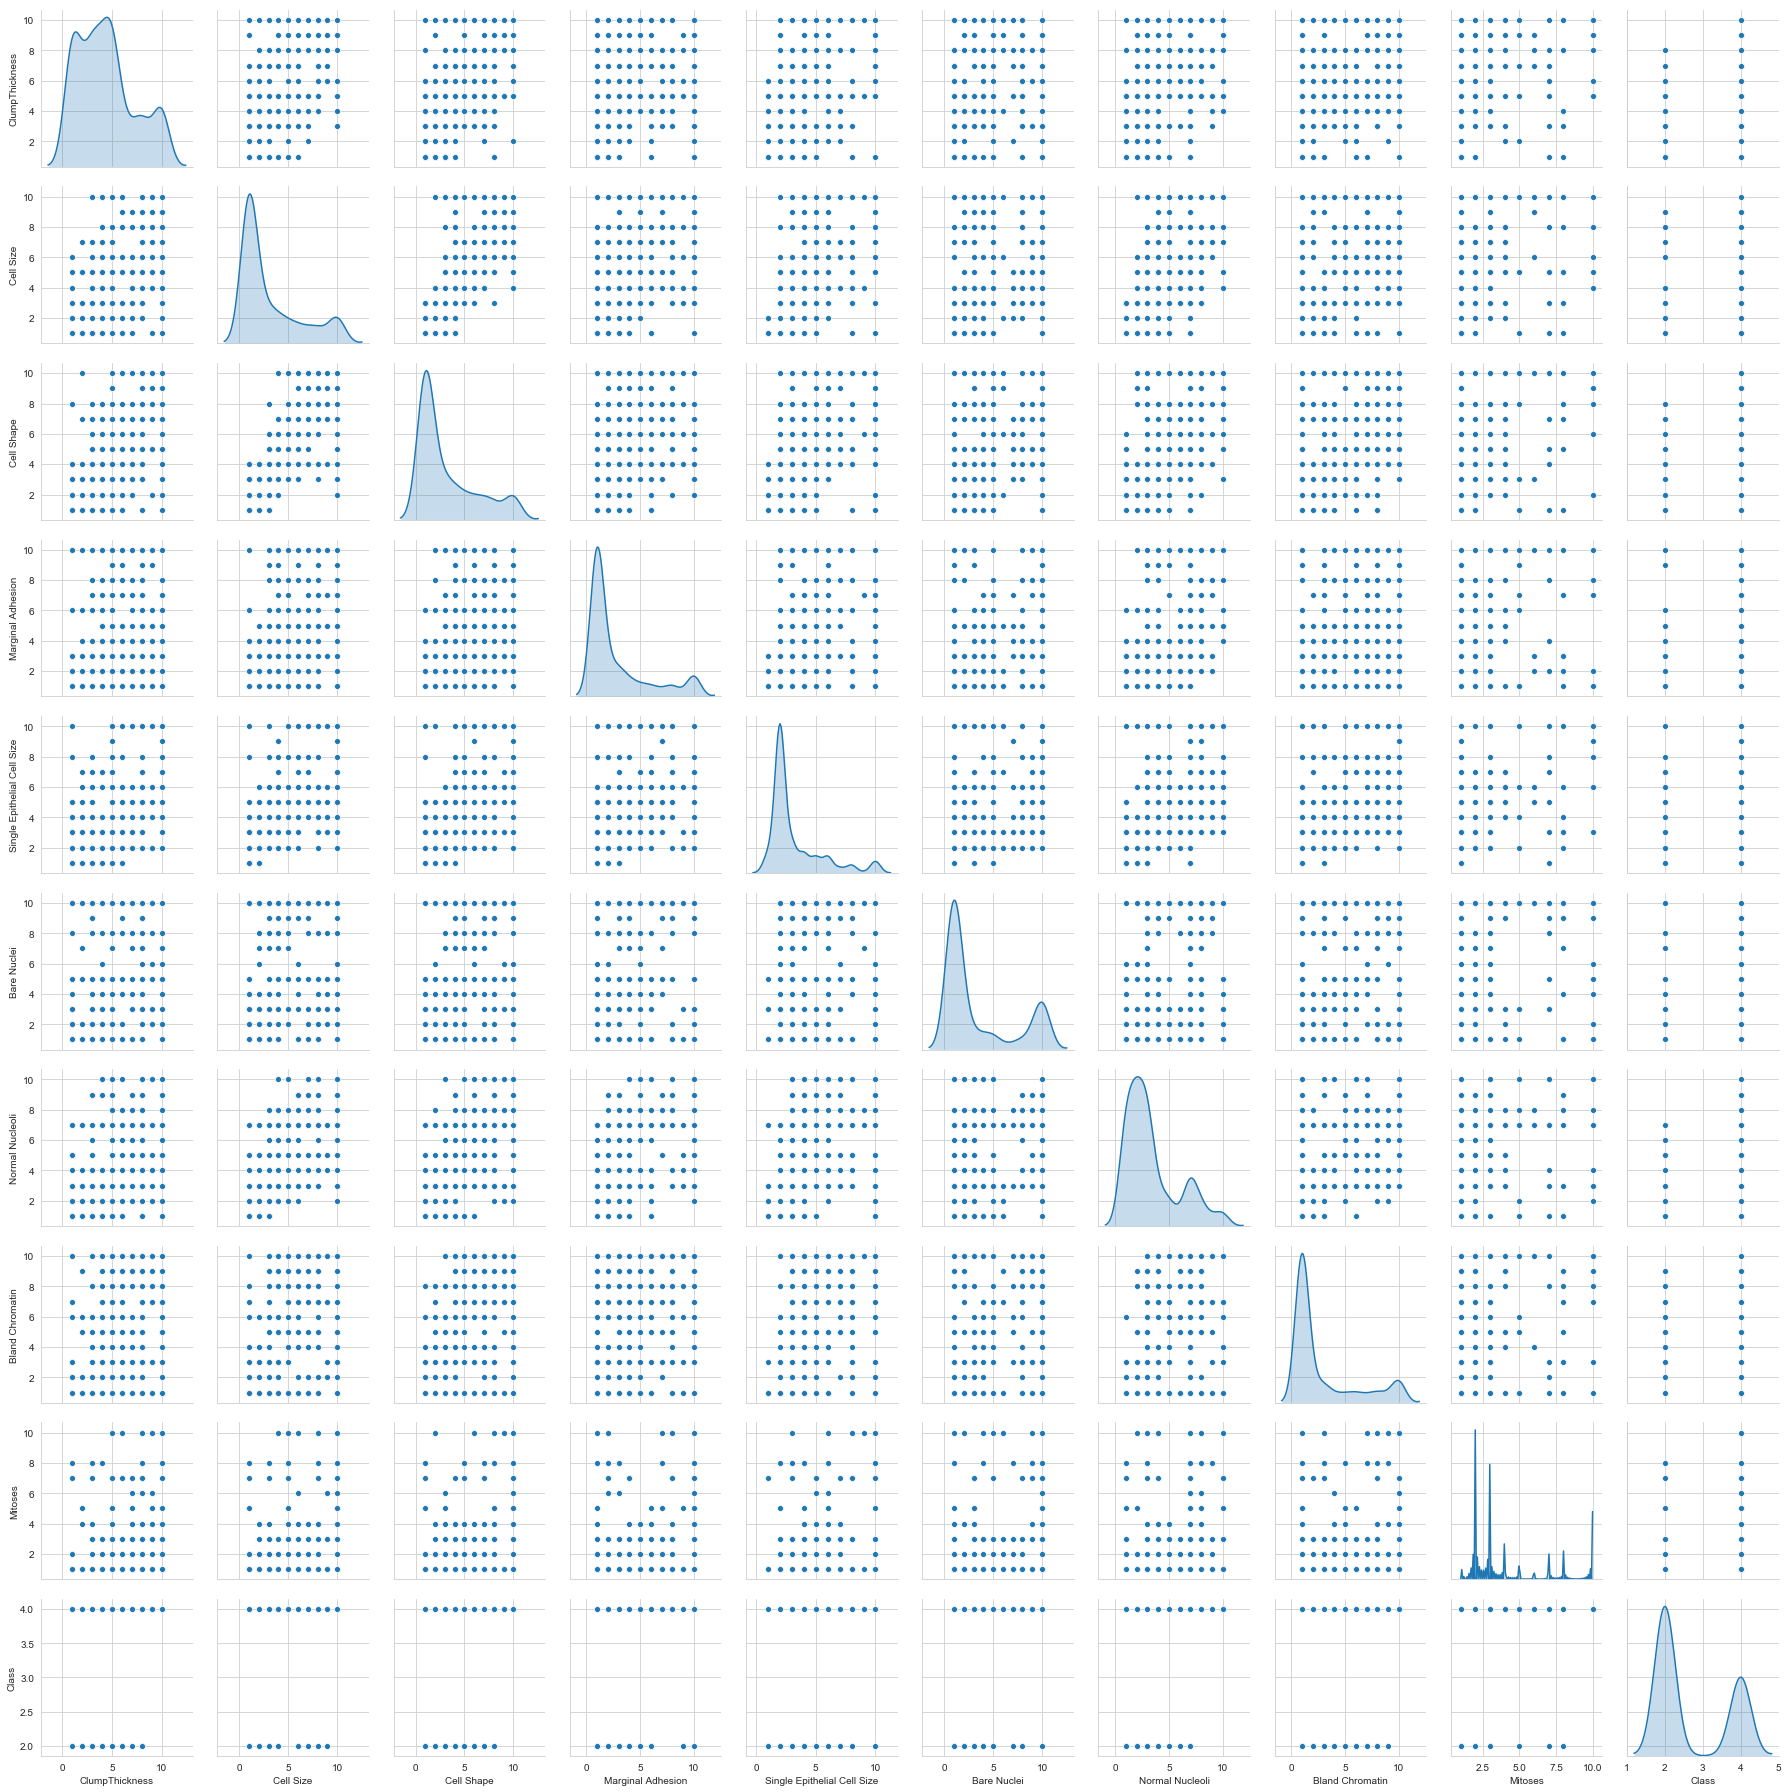

In [24]:
#Let us check for pair plots
import seaborn as sns
sns.set_style("whitegrid")
sns.pairplot(Cancer_df_attr,diag_kind='kde');

In [25]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

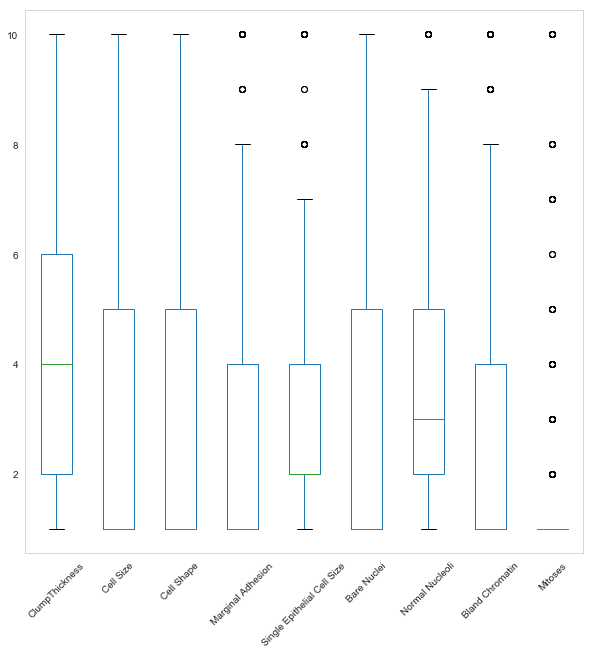

In [26]:
boxplot = Cancer_df_attr.boxplot(column=['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
     'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
     'Bland Chromatin', 'Mitoses'], grid=False, rot=45, fontsize=10,figsize=(10, 10));

- Outliers are present in Mitoses,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli

In [27]:
pd.crosstab(Cancer_df_attr['Mitoses'],Cancer_df_attr['Class'])

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [28]:
# Mitoses greater than 4 belongs to class 4 so convert those to class 4 
Cancer_df_attr['Mitoses']=np.where(Cancer_df_attr['Mitoses']>4,4,Cancer_df_attr['Mitoses'])

In [29]:
pd.crosstab(Cancer_df_attr['Mitoses'],Cancer_df_attr['Class'])

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,3,49


In [30]:
# We could see most of the outliers are now removed.

In [31]:
pd.crosstab(Cancer_df_attr['Marginal Adhesion'],Cancer_df_attr['Class'])


Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [32]:
###### ClumpThickness greater than 4 belongs to class 4 so convert those to class 4 
Cancer_df_attr['Marginal Adhesion']=np.where(Cancer_df_attr['Marginal Adhesion']>8,4,Cancer_df_attr['Marginal Adhesion'])

In [33]:
pd.crosstab(Cancer_df_attr['Single Epithelial Cell Size'],Cancer_df_attr['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [34]:
###### ClumpThickness greater than 4 belongs to class 4 so convert those to class 4 
Cancer_df_attr['Single Epithelial Cell Size']=np.where(Cancer_df_attr['Single Epithelial Cell Size']>5,4,Cancer_df_attr['Single Epithelial Cell Size'])

In [35]:

pd.crosstab(Cancer_df_attr['Bland Chromatin'],Cancer_df_attr['Class'])

Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [36]:
###### ClumpThickness greater than 4 belongs to class 4 so convert those to class 4 
Cancer_df_attr['Bland Chromatin']=np.where(Cancer_df_attr['Bland Chromatin']>5,4,Cancer_df_attr['Bland Chromatin'])

In [37]:

pd.crosstab(Cancer_df_attr['Normal Nucleoli'],Cancer_df_attr['Class'])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


In [38]:
###### ClumpThickness greater than 4 belongs to class 4 so convert those to class 4 
Cancer_df_attr['Normal Nucleoli']=np.where(Cancer_df_attr['Normal Nucleoli']>5,4,Cancer_df_attr['Normal Nucleoli'])

In [39]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    if np.where(ys > upper_bound):
        ys = upper_bound
    if np.where(ys < lower_bound):
        ys = lower_bound
    i = np.where((ys > upper_bound) | (ys < lower_bound))
    return i 
    
for features in Cancer_df_attr.columns:
    print  (outliers_iqr ( Cancer_df_attr[features]))

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)


- All outliers are removed as array not having any rows index in it

In [40]:
df=Cancer_df_attr.drop(columns=['Class'])

In [41]:
#standardize variables 
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df)


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Q6 Create a covariance matrix for identifying Principal components

In [42]:
# PCA
# Step 1 - Create covariance matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[1.00145138 0.64410677 0.65453792 0.49279485 0.56309055 0.59150555
  0.54306288 0.56513065 0.40833694]
 [0.64410677 1.00145138 0.9066632  0.69312971 0.74842409 0.68556472
  0.65252251 0.71750793 0.50716101]
 [0.65453792 0.9066632  1.00145138 0.66107626 0.73097669 0.70518656
  0.64121237 0.7072139  0.47825312]
 [0.49279485 0.69312971 0.66107626 1.00145138 0.65900024 0.64939578
  0.54963257 0.62452033 0.37448278]
 [0.56309055 0.74842409 0.73097669 0.65900024 1.00145138 0.67659811
  0.6167611  0.7045218  0.43620132]
 [0.59150555 0.68556472 0.70518656 0.64939578 0.67659811 1.00145138
  0.64633781 0.63748767 0.43475778]
 [0.54306288 0.65252251 0.64121237 0.54963257 0.6167611  0.64633781
  1.00145138 0.63838672 0.36615097]
 [0.56513065 0.71750793 0.7072139  0.62452033 0.7045218  0.63748767
  0.63838672 1.00145138 0.47007313]
 [0.40833694 0.50716101 0.47825312 0.37448278 0.43620132 0.43475778
  0.36615097 0.47007313 1.00145138]]


# Q7 Identify eigen values and eigen vector

In [43]:
# Step 2- Get eigen values and eigen vector

In [44]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.3083111   0.04093704 -0.01220437 -0.80831219  0.28645615  0.18553531
   0.13571959 -0.31584958  0.12283989]
 [-0.37451942 -0.00926435 -0.72354477  0.01838417  0.25249484 -0.29940635
  -0.08313034  0.40472623  0.108086  ]
 [-0.37094046 -0.03760046  0.67875655 -0.05367363  0.26292466 -0.28762317
  -0.20188754  0.45251491  0.00364329]
 [-0.32471212 -0.21671806  0.06885989  0.48565701  0.29884863  0.45647187
   0.10751613 -0.16957651  0.5186501 ]
 [-0.35019459 -0.11153002  0.03665101  0.21035655  0.06164854 -0.21697562
   0.6820291  -0.19164756 -0.51629467]
 [-0.34277077 -0.11669715 -0.0842522   0.00451456 -0.15273541  0.59412484
  -0.38006737  0.13761392 -0.56751205]
 [-0.32101635 -0.21574888  0.03127413 -0.16028649 -0.78674189 -0.00718608
   0.22676578  0.20403707  0.33415985]
 [-0.34499696 -0.01404559 -0.00735467  0.13768047 -0.18379617 -0.41170751
  -0.50345635 -0.63623789  0.01479058]
 [-0.24380776  0.93651257  0.03752318  0.13649876 -0.12600344  0.12337493
   0.088

# Q8 Find variance and cumulative variance by each eigen vector

In [45]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
5.908312517699071
0.7108991804754347
0.5268096690262735
0.45615921121359565
0.39184123817034705
0.3375659441365162
0.3165557696648023
0.2744021619120496
0.09051671699073152


In [46]:

tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)



Cumulative Variance Explained [ 65.55277495  73.44020709  79.28516461  84.34625473  88.69373642
  92.43903329  95.9512221   98.9957163  100.        ]


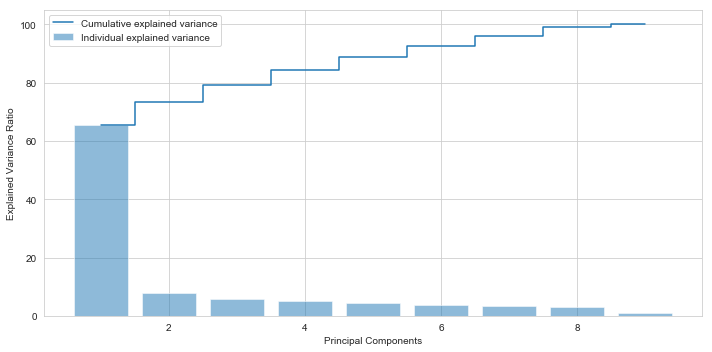

In [47]:

# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

### First 9 principal components explain the variance in the data. 


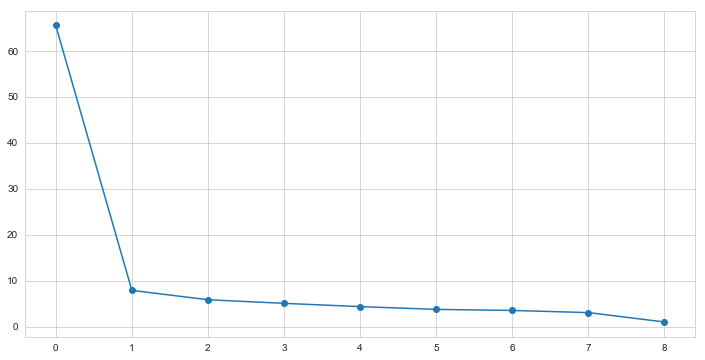

In [48]:
'''Plotting Elbow/ Scree Plot'''
plt.figure(figsize=(12,6))
plt.plot( var_exp, marker = "o" )

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [49]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
data_reduced = pca.fit_transform(X_std)
data_reduced.transpose()

array([[-1.41079783,  1.77405568, -1.53498677, ...,  3.31191152,
         2.11402871,  2.95657757],
       [-0.0998079 , -1.10811542, -0.16117572, ...,  0.11229502,
        -0.94778618, -1.22274461],
       [-0.79708115,  0.68432665, -0.22161134, ...,  0.32250893,
         0.57239695,  0.98716179],
       [ 0.47428515, -0.26373046,  0.72003909, ..., -0.21823014,
         0.20664011, -0.14212954],
       [-0.11321155, -1.2468745 , -0.1457835 , ...,  2.02463965,
         1.03943098,  1.03505191]])

In [50]:
# Loadings or Eigen vectors on the PCA components
pca.components_

array([[ 0.3083111 ,  0.37451942,  0.37094046,  0.32471212,  0.35019459,
         0.34277077,  0.32101635,  0.34499696,  0.24380776],
       [ 0.04093704, -0.00926435, -0.03760046, -0.21671806, -0.11153002,
        -0.11669715, -0.21574888, -0.01404559,  0.93651257],
       [-0.80831219,  0.01838417, -0.05367363,  0.48565701,  0.21035655,
         0.00451456, -0.16028649,  0.13768047,  0.13649876],
       [-0.28645615, -0.25249484, -0.26292466, -0.29884863, -0.06164854,
         0.15273541,  0.78674189,  0.18379617,  0.12600344],
       [-0.18553531,  0.29940635,  0.28762317, -0.45647187,  0.21697562,
        -0.59412484,  0.00718608,  0.41170751, -0.12337493]])

# Q10 Find correlation between components and features

Text(0.5, 1.0, 'Correlation between different features')

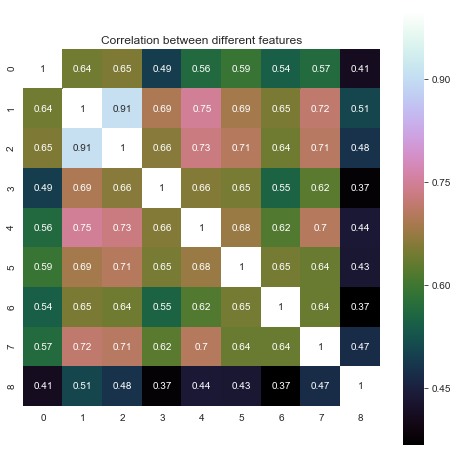

In [51]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix');

plt.title('Correlation between different features')

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


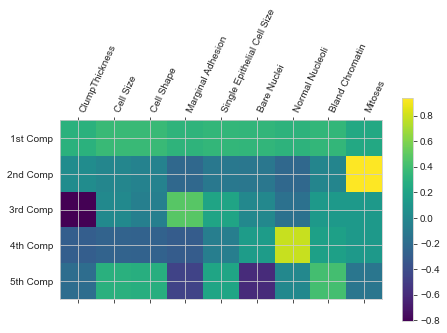

In [52]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(df.columns)),df.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [53]:
Rec_df=pd.read_csv('jokes.csv')

# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [90]:
ratings=Rec_df[:200]
ratings=ratings.drop(ratings.columns[0],axis=1)
ratings
    

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q13 Change the column indices from 0 to 99

In [92]:
col = np.arange(0,100)
ratings.columns = col
ratings

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [93]:
ratings.replace(99, 00)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [94]:

from sklearn.preprocessing import StandardScaler
ratings_diff = StandardScaler().fit_transform(ratings)
ratings_diff.shape

(200, 100)

### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [95]:
ratings_diff = pd.DataFrame(ratings_diff)
rank = ratings_diff.mean()
rank

0    -4.940492e-17
1    -6.217249e-17
2    -6.106227e-17
3     2.536860e-16
4    -8.881784e-18
5    -8.881784e-18
6    -1.665335e-18
7     2.331468e-17
8    -9.492407e-17
9     9.992007e-18
10   -2.386980e-17
11    1.126876e-16
12    6.661338e-17
13   -1.221245e-17
14   -2.164935e-17
15   -1.065814e-16
16    1.637579e-17
17    2.331468e-17
18   -9.159340e-18
19    2.997602e-17
20   -4.718448e-18
21    9.020562e-17
22    3.275158e-17
23   -5.606626e-17
24    4.996004e-18
25    2.983724e-17
26   -5.440093e-17
27   -1.672273e-17
28   -2.775558e-18
29    1.054712e-17
          ...     
70    1.743050e-16
71    1.443290e-17
72    2.153833e-16
73   -6.772360e-17
74    2.997602e-17
75    4.996004e-17
76   -3.030909e-16
77    7.327472e-17
78    7.771561e-18
79   -2.886580e-16
80    3.885781e-17
81   -1.598721e-16
82   -6.328271e-17
83    1.665335e-16
84    2.642331e-16
85    2.886580e-17
86   -3.441691e-17
87    2.831069e-16
88   -2.220446e-17
89   -3.974598e-16
90    1.004752e-16
91   -3.2085

In [96]:
rank = pd.DataFrame(rank.sort_values(ascending= False))

In [97]:
rank.head(10)

,0
87,2.831069e-16
84,2.642331e-16
3,2.536860e-16
95,2.342571e-16
72,2.153833e-16
70,1.743050e-16
93,1.676437e-16
83,1.665335e-16
96,1.476597e-16
63,1.426637e-16
